In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
DATA_DIR = './data'

In [2]:
import numpy as np

In [3]:
import os
import pandas as pd
data = pd.read_csv(os.path.join(DATA_DIR,'city_day.csv'))
delhi_data = data[data['City']=='Delhi']

In [4]:
from prophet import Prophet

In [5]:
delhi_data['ds'] = pd.to_datetime(delhi_data['Date'])
delhi_data['y'] = delhi_data['PM2.5']

<ipython-input-5-d18c2c9c22be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['ds'] = pd.to_datetime(delhi_data['Date'])
<ipython-input-5-d18c2c9c22be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['y'] = delhi_data['PM2.5']


In [6]:
mask = (delhi_data['Date']>='2018-07-01') & (delhi_data['Date']<'2019-07-01')
test, train = delhi_data.loc[mask],delhi_data.loc[delhi_data['Date']<'2019-01-01']

In [31]:
m1 = Prophet(yearly_seasonality=2000)
m1.fit(delhi_data)
fcast1 = m1.predict(test)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(fcast1['yhat'].to_numpy(),test['y'].to_numpy())
rmse = np.sqrt(mse)
rmse

18.533817246102544

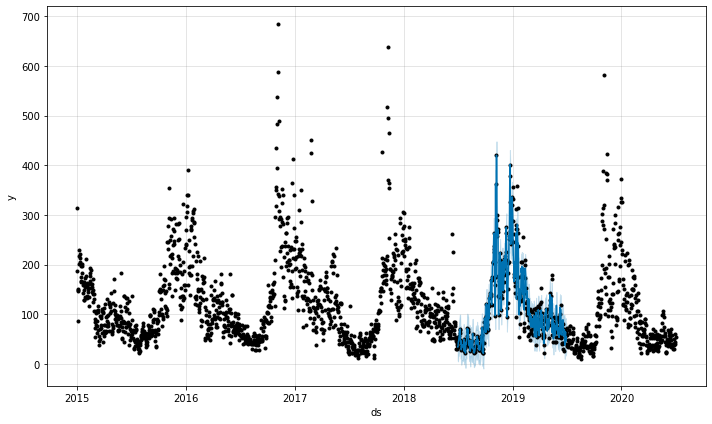

In [25]:
from matplotlib import pyplot
m1.plot(fcast1)
pyplot.show()

In [26]:
m = Prophet()
m.fit(delhi_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


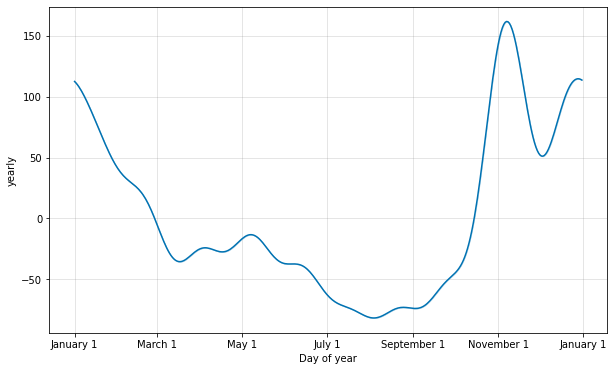

In [27]:
from prophet.plot import plot_yearly
a = plot_yearly(m)

In [28]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2369,2021-06-27,5.082651,-61.764506,65.209193
2370,2021-06-28,2.165042,-60.060010,61.698549
2371,2021-06-29,1.849581,-63.288228,63.258334
2372,2021-06-30,2.006881,-61.052971,63.573045
2373,2021-07-01,2.948974,-55.127250,68.304144


Text(0.5, 1.0, 'O3 Forecast')

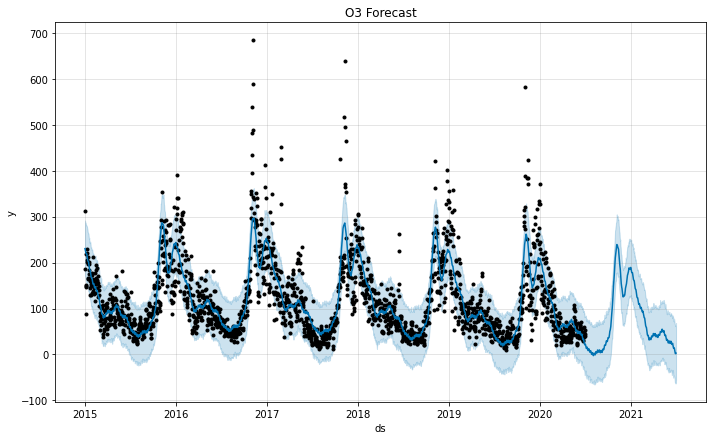

In [29]:
fig1 = m.plot(forecast)
ax = fig1.gca()
ax.set_title("O3 Forecast")

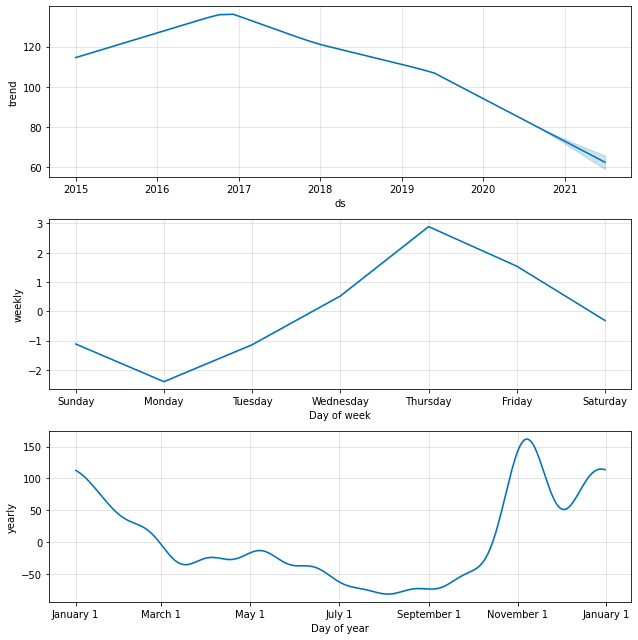

In [30]:
fig2 = m.plot_components(forecast)